# Dust and gas maps

Documentation on dust maps: https://dustmaps.readthedocs.io/en/latest/installation.html

More info on dust maps: http://argonaut.skymaps.info/usage

This tutorial gets E(B-V) from dust maps.

- One can download the maps and quesry locally,
- Or there is also an online quesry mode.
- It is possible to search just one coordinate,
- Or to create a grid and get a map.

Then the tutorial downloads a neutral hydrogen column density map for the same region N(HI), and compares the two data sets. 

Documentation on skyview: https://astroquery.readthedocs.io/en/latest/skyview/skyview.html 


In [88]:
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery

from dustmaps.sfd import SFDWebQuery
from dustmaps.bayestar import BayestarWebQuery

from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.skyview import SkyView
from astropy.wcs import WCS

In [ ]:
!pwd

In [ ]:
# downloading data files for dust maps

from dustmaps.config import config
config['data_dir'] = '/Users/denes/Teaching/Astrophysical_objects/Tutorials/dust_maps/'

#import dustmaps.sfd
#dustmaps.sfd.fetch()

#import dustmaps.csfd
#dustmaps.csfd.fetch()

import dustmaps.planck
dustmaps.planck.fetch()

#import dustmaps.planck
#dustmaps.planck.fetch(which='GNILC')

#import dustmaps.bayestar
#dustmaps.bayestar.fetch()

#import dustmaps.iphas
#dustmaps.iphas.fetch()

#import dustmaps.marshall
#dustmaps.marshall.fetch()

#import dustmaps.chen2014
#dustmaps.chen2014.fetch()

#import dustmaps.lenz2017
#dustmaps.lenz2017.fetch()

#import dustmaps.pg2010
#dustmaps.pg2010.fetch()

#import dustmaps.leike_ensslin_2019
#dustmaps.leike_ensslin_2019.fetch()

#import dustmaps.leike2020
#dustmaps.leike2020.fetch()

#import dustmaps.edenhofer2023
#dustmaps.edenhofer2023.fetch()

#import dustmaps.gaia_tge
#dustmaps.gaia_tge.fetch()

In [ ]:
# test query

bayestar = BayestarQuery(version='bayestar2019') # 'bayestar2019' is the default
coords = SkyCoord(119.*units.deg, 3.*units.deg, distance=1000.*units.pc, frame='galactic')
 
reddening = bayestar(coords, mode='median')
print(reddening)

## Plotting maps

example from:
https://dustmaps.readthedocs.io/en/latest/examples.html

In [2]:
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as units
from astropy.coordinates import SkyCoord

from dustmaps.sfd import SFDQuery
from dustmaps.planck import PlanckQuery
from dustmaps.bayestar import BayestarQuery

In [136]:
c_g = SkyCoord(l=37*u.degree, b=-20*u.degree, frame='galactic')
c_g.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (302.51505385, -5.54491684)>

In [173]:
ra0, dec0 = (302., -5.)
ra = np.arange(ra0 - 4., ra0 + 4., 0.05)
dec = np.arange(dec0 - 4., dec0 + 4., 0.05)
ra, dec = np.meshgrid(ra, dec)
coords = SkyCoord(ra*units.deg, dec*units.deg,
                  distance=1.*units.kpc, frame='icrs')

In [174]:
sfd = SFDQuery()
Av_sfd = 2.742 * sfd(coords)

#planck = PlanckQuery()
#Av_planck = 3.1 * planck(coords)

bayestar = BayestarQuery(max_samples=1)
Av_bayestar = 2.742 * bayestar(coords)

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 24.341 s
  pix_info:   0.941 s
   samples:   9.312 s
      best:   6.056 s
       nan:   0.229 s
      sort:   7.632 s
       idx:   0.171 s


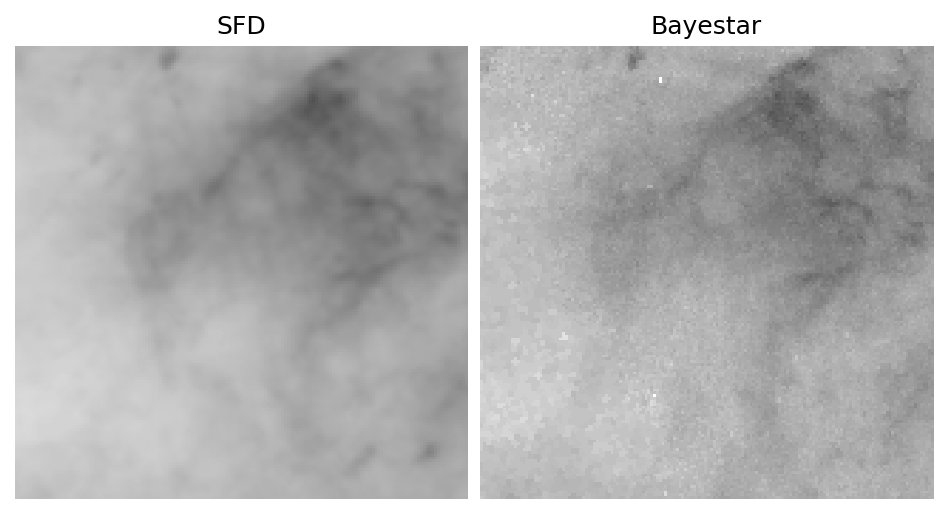

In [175]:
fig = plt.figure(figsize=(12,4), dpi=150)

for k,(Av,title) in enumerate([(Av_sfd, 'SFD'),
                               (Av_bayestar, 'Bayestar')]):
    ax = fig.add_subplot(1,3,k+1)
    ax.imshow(
        np.sqrt(Av)[::,::-1],
        vmin=0.,
        vmax=2.,
        origin='lower',
        interpolation='nearest',
        cmap='binary',
        aspect='equal'
    )
    ax.axis('off')
    ax.set_title(title)

fig.subplots_adjust(wspace=0., hspace=0.)
plt.savefig('comparison.png', dpi=150)

## Doing a Web based Query

This does not work with Planck

In [149]:
sfd = SFDWebQuery()
Av_sfd = 2.742 * sfd(coords)

bayestar = BayestarWebQuery()
Av_bayestar = 2.742 * bayestar(coords)

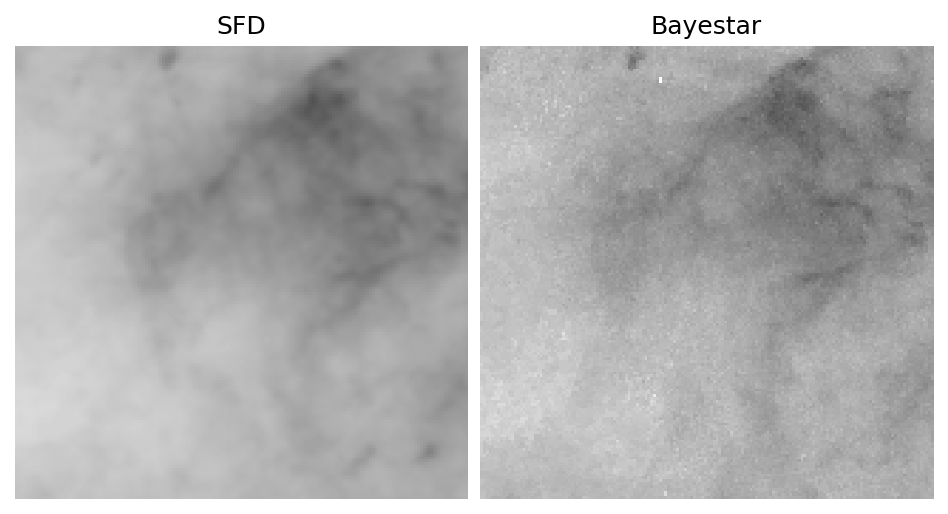

In [150]:
fig = plt.figure(figsize=(12,4), dpi=150)

for k,(Av,title) in enumerate([(Av_sfd, 'SFD'),
                               (Av_bayestar, 'Bayestar')]):
    ax = fig.add_subplot(1,3,k+1)
    ax.imshow(
        np.sqrt(Av)[::,::-1],
        vmin=0.,
        vmax=2.,
        origin='lower',
        interpolation='nearest',
        cmap='binary',
        aspect='equal'
    )
    ax.axis('off')
    ax.set_title(title)

fig.subplots_adjust(wspace=0., hspace=0.)
plt.savefig('comparison.png', dpi=150)

In [151]:
Av.shape

(160, 160)

## HI column denisty map

The best data for this is HI4PI, which is available from Skyview.

Important, need to make sure to get the data at the same coordinates with the same pixel resolution! The dust maps do not have metadata.

In [189]:
c = SkyCoord(ra=ra0*u.degree, dec=dec0*u.degree, frame='icrs')

In [190]:
c.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (302., -5.)>

In [191]:
# get HI column denisty map for the same region of the sky
path = SkyView.get_images(position=c.icrs, width=8*u.deg, height=8*u.deg, survey=['HI4PI'], pixels=[160,160])

hdulist_HI = path[0]
d_HI = hdulist_HI[0].data
h_HI = hdulist_HI[0].header

In [192]:
#h_HI

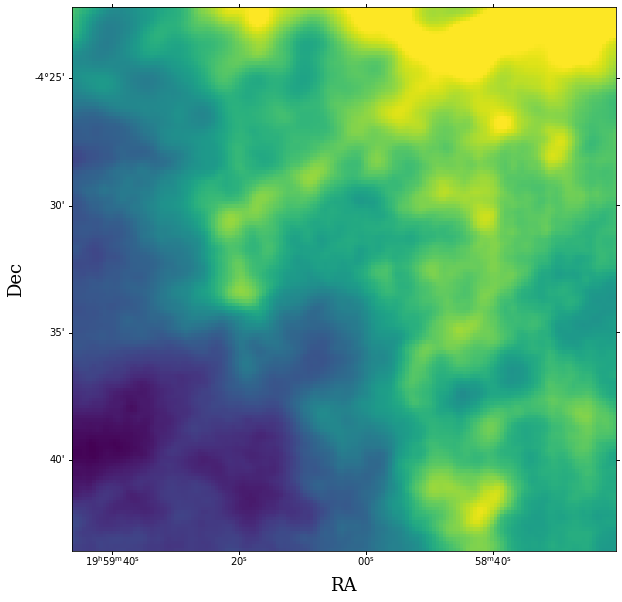

In [193]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_DSS2))
ax.imshow(d_HI, vmax=np.percentile(d_DSS2, 99.8))
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()

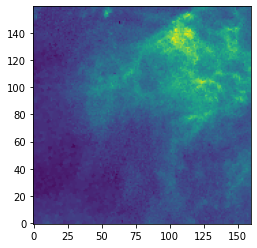

In [194]:
Av2 = Av[:, ::-1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(Av2)
ax.invert_yaxis()

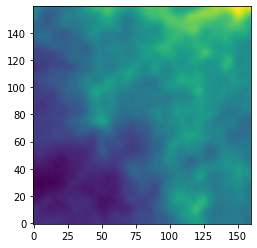

In [195]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(d_HI)
ax.invert_yaxis()

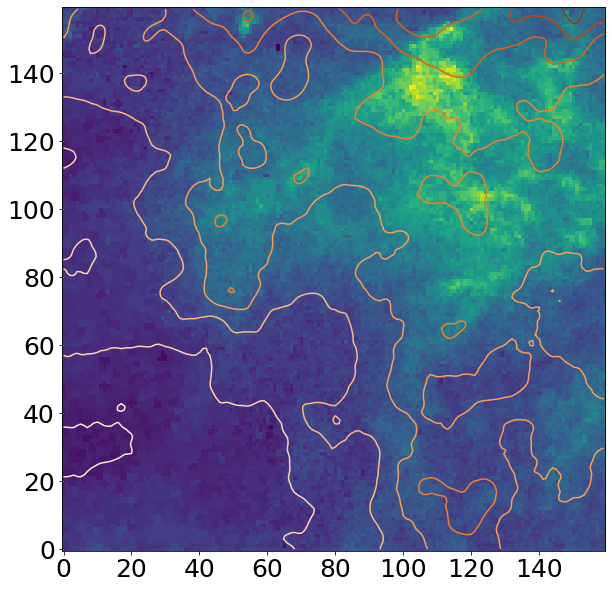

In [196]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(Av2)
ax.contour(d_HI, levels=10, cmap='Oranges')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.invert_yaxis()
plt.show()

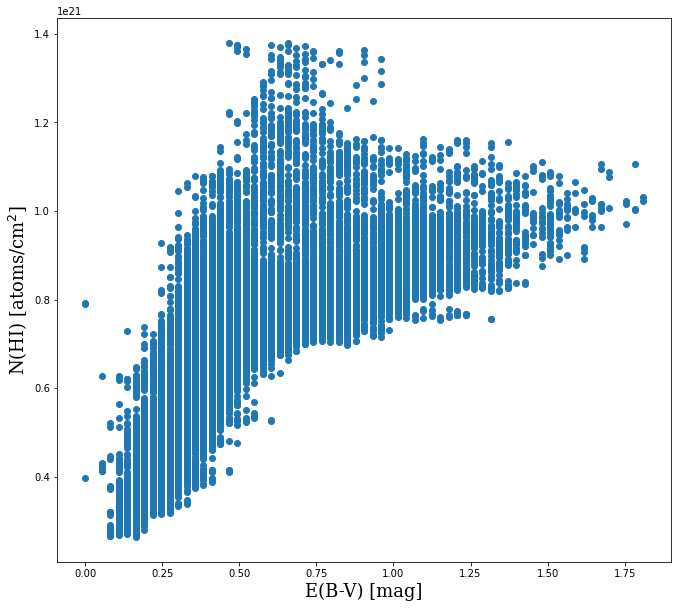

In [197]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1)
plt.scatter(Av2, d_HI)
ax.set_xlabel('E(B-V) [mag]', size=18,family='serif')
ax.set_ylabel(r'N(HI) [atoms/cm$^2$]', size=18,family='serif')
plt.show()